In [31]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import comb, gamma

In [32]:
import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning)

*Function for reading a csv file:*

In [33]:
def get_data_from_csv_file(file_path: str, to_type: str) -> list:
    data = []

    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')

        for row in reader:
            if to_type == 'int':
                data.append([int(value) for value in row])
            elif to_type == 'float':
                data.append([float(value) for value in row])

    return np.array(data)

*Function for plotting a distribution function of random variables:*

In [34]:
def plot_distribution_function(data: np.ndarray) -> None:
    data = np.sort(data)

    count_dict = {}
    for value in data:
        if value in count_dict:
            count_dict[value] += 1
        else:
            count_dict[value] = 1

    pre_first = data[0] - 1
    x = np.array([pre_first] + list(count_dict.keys()))  
    
    count_dict[pre_first] = 0  
    P_x = np.zeros(len(count_dict), dtype=float)

    sum = 0
    for i, key in enumerate(count_dict):
        P_x[i] = sum / len(data)
        sum += count_dict[key]

    plt.step(x, P_x, where='post', color='hotpink')

    plt.title('The distribution function of a random variable')
    plt.xlabel('x')
    plt.ylabel('P(x)')

    plt.show()

*Function for plotting a histogram:*

In [35]:
def plot_histogram(data: np.ndarray, intervals: int) -> None:
    plt.hist(data, bins=intervals, color='hotpink', edgecolor='pink')

    plt.title('Histogram')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    plt.show()

*Function for getting the characteristics:*

In [36]:
def get_the_characteristics(data: np.ndarray) -> tuple[float, float, float]:
    mean = sum(data) / len(data)
    variance = sum([(x - mean) ** 2 for x in data]) / len(data)
    rms_deviation = np.sqrt(variance)

    return mean, variance, rms_deviation

*Functions for plotting various distributions histograms:*

In [37]:
%matplotlib inline

In [38]:
def plot_normal_histogram(mean: float, rms_deviation: float) -> None:
    data = np.random.normal(mean, rms_deviation, size=100000)
    
    plt.hist(data, bins=15, color='pink', edgecolor='hotpink')
    plt.title('Normal')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # plt.show()


def plot_geometric_histogram(mean: float) -> None:
    p = 1 / mean
    if p > 1:
        p = 0.5

    data = np.random.geometric(p, size=1000000)

    plt.hist(data, bins=15, color='pink', edgecolor='hotpink')
    plt.title('Geometric')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # plt.show()


def plot_binomial_histogram(mean: float) -> None:        
    n = 1000
    p = mean / n
    if p > 1:
        p = 0.5

    data = np.random.binomial(n, p, size=1000000)

    plt.hist(data, bins=15, color='pink', edgecolor='hotpink')
    plt.title('Binomial')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # plt.show()


def plot_poisson_histogram(mean: float) -> None:
    data = np.random.poisson(mean, 1000000)

    plt.hist(data, bins=15, color='pink', edgecolor='hotpink')
    plt.title('Poisson')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # plt.show()


def plot_uniform_histogram(a: float, b: float) -> None:
    data = np.random.uniform(a, b, 1000000)

    plt.hist(data, bins=15, color='pink', edgecolor='hotpink')
    plt.title('Uniform')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # plt.show()
    

def plot_exponential_histogram(mean: float) -> None:
    data = np.random.exponential(scale=1/mean, size=1000000)

    plt.hist(data, bins=15, color='pink', edgecolor='hotpink')
    plt.title('Exponential')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    # plt.show()
    

In [39]:
def plot_all_histograms(mean: float, rms_deviation: float, a: float, b: float) -> None:
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plot_normal_histogram(mean, rms_deviation)

    plt.subplot(2, 3, 2)
    plot_geometric_histogram(mean)

    plt.subplot(2, 3, 3)
    plot_binomial_histogram(mean)

    plt.subplot(2, 3, 4)
    plot_poisson_histogram(mean)

    plt.subplot(2, 3, 5)
    plot_uniform_histogram(a, b)

    plt.subplot(2, 3, 6)
    plot_exponential_histogram(mean)

    plt.tight_layout()
    plt.show()

*Function for removing outliers:*

In [40]:
def remove_outliers(data: np.ndarray, threshold: float) -> tuple[list, list]:
    mean, _, deviation = get_the_characteristics(data)
 
    z_scores = np.abs((data - mean) / deviation)

    outliers = [x for x, z in zip(data, z_scores) if z > threshold]
    cleaned_data = [x for x, z in zip(data, z_scores) if z <= threshold]
    
    return cleaned_data, outliers

### Set 1

In [41]:
file_path = "set_1.csv"
data = get_data_from_csv_file(file_path, 'int')[0]

data, outliers = remove_outliers(data, 4)
print('Detected outliers: ', outliers)
print(len(outliers))

Detected outliers:  [17, 17, 17, 30, 20, 17, 21, 44, 18, 30, 17, 29, 28, 29, 27, 22, 19, 18, 18, 24, 19, 32, 18, 22, 17, 31, 21, 19, 17, 30, 37, 28, 19, 28, 29, 17, 24, 18, 28, 17, 29, 31, 22, 33, 17, 17, 30, 22, 28, 17, 20, 17, 17, 22, 19, 32, 28, 32, 17, 18, 28, 33, 21, 19, 32, 21, 18, 18, 28, 18, 25, 29, 29, 18, 19, 18, 17, 22, 30, 17, 25, 18, 28, 30, 32, 19, 17, 31, 19, 19, 28, 17, 28, 17, 29, 31, 18, 18, 32, 17, 21, 34, 31, 17, 42, 28, 17, 17, 17, 19, 32, 17, 21, 18, 19, 39, 28, 17, 30, 29, 30, 17, 34, 21, 33, 28, 19, 24, 28, 21, 31, 19, 23, 18, 18, 29, 18, 30, 28, 19, 30, 35, 32, 22, 18, 17, 29, 28, 29, 34, 17, 32, 20, 38, 28, 19, 17, 21, 33, 17, 17, 22, 28, 34, 29, 17, 17, 31, 34, 21, 17, 23, 17, 20, 33, 29, 17, 31, 29, 20, 28, 18, 33, 28, 17, 17, 18, 29, 28, 21, 17, 30, 21, 17, 32, 29, 28, 19, 17, 28, 31, 20, 17, 38, 19, 18, 24, 17, 29, 27, 31, 23, 29, 29, 28, 28, 17, 24, 18, 36, 30, 33, 18, 28, 19, 17, 30, 22, 28, 28, 23, 30, 33, 32, 31, 28, 17, 28, 20, 29, 28, 31, 20, 28, 24,

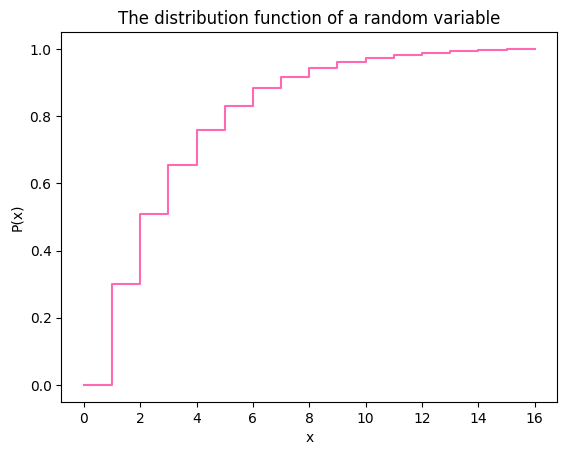

In [42]:
plot_distribution_function(data)

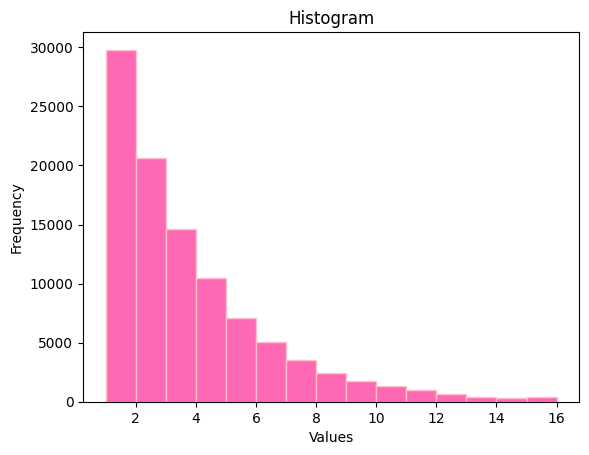

In [43]:
plot_histogram(data, 15)

In [44]:
mean, variance, rms_deviation = get_the_characteristics(data)

print('Mean =', mean)
print('Variance =', variance)
print('RMS deviation =', rms_deviation)

Mean = 3.3100151943569567
Variance = 7.098499098175101
RMS deviation = 2.6643008648002016


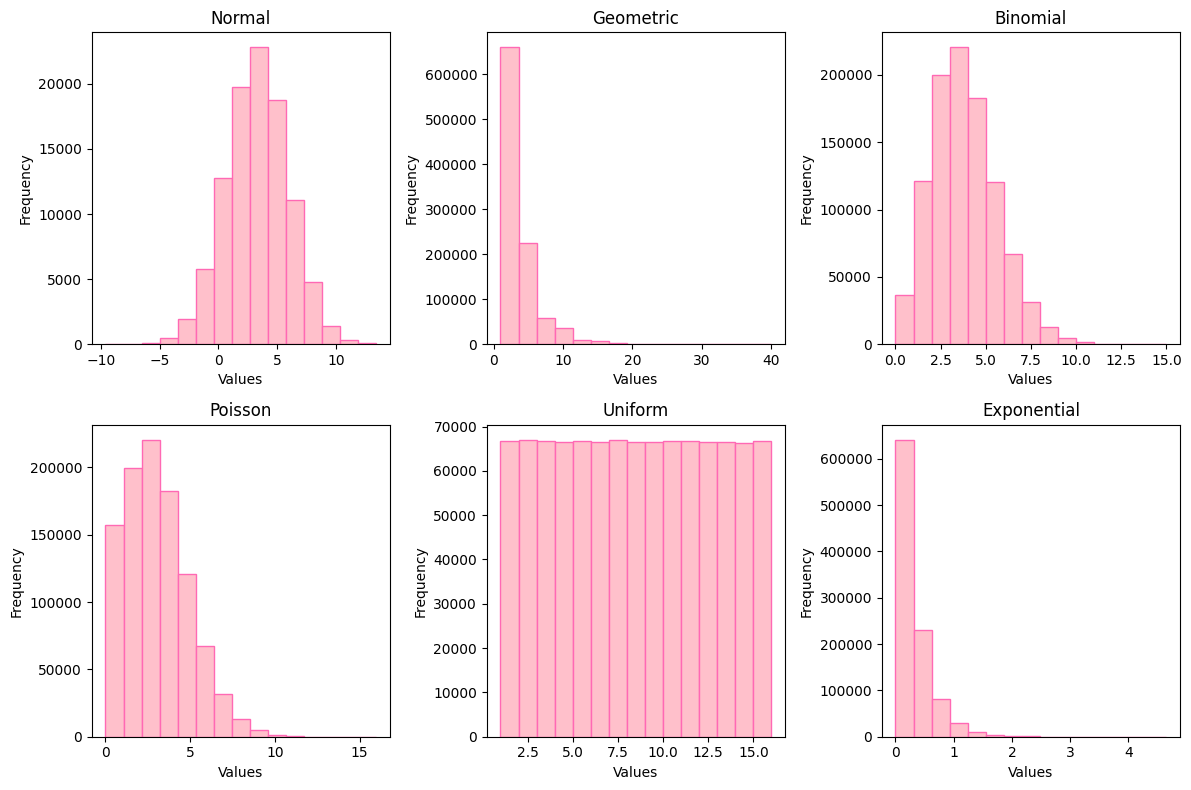

In [45]:
a = np.min(data)
b = np.max(data)

plot_all_histograms(mean, rms_deviation, a, b)

### Set 2

In [46]:
file_path = "set_2.csv"

data = get_data_from_csv_file(file_path, 'float')[0]

data, outliers = remove_outliers(data, 3)
print('Detected outliers: ', outliers)
print(len(outliers))

Detected outliers:  [-442.386865, -401.17965, 334.867145, -518.66588, -433.237337, -537.696115, 390.494746, -419.245011, -517.246434, 388.143258, -625.894268, -609.63412, -436.371126, -531.173852, -440.038277, -463.412375, -498.314028, -506.139453, -660.206981, -485.434348, -574.339773, -493.571292, -507.48267, 379.68578, 346.017429, -458.300145, 625.617674, -469.048631, 442.602097, -445.433431, -523.460457, -425.936023, -1049.024063, -570.104485, -622.34542, 351.627587, -550.635866, -612.863464, 418.620985, -566.010349, 371.559939, -453.372719, 378.206555, -451.487807, -386.888585, -354.722245, -436.113367, -461.137393, -656.290311, -457.4364, -482.484953, 353.497547, -445.781023, 346.445874, -310.324803, -518.059922, -506.36209, -462.749311, 437.812471, -671.047647, -552.644286, 331.956936, -885.478549, -443.766478, -499.316464, -418.40478, 380.73305, -388.802127, -513.343579, 371.221152, -453.17347, 375.587448, -494.951384, -417.349819, 363.331275, -572.130802, -1071.786686, -470.51

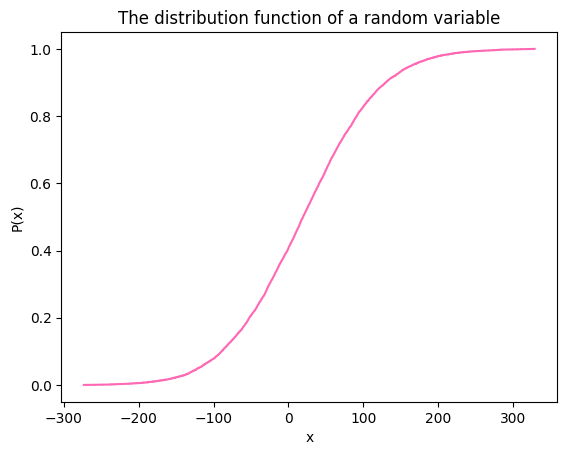

In [47]:
plot_distribution_function(data)

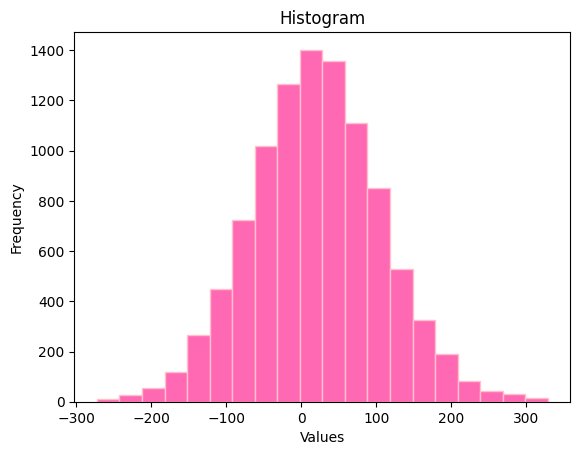

In [48]:
plot_histogram(data, 20)

In [49]:
mean, variance, rms_deviation = get_the_characteristics(data)

print('Mean =', mean)
print('Variance =', variance)
print('RMS deviation =', rms_deviation)

Mean = 20.33012698793716
Variance = 7471.888867374863
RMS deviation = 86.44008831193351


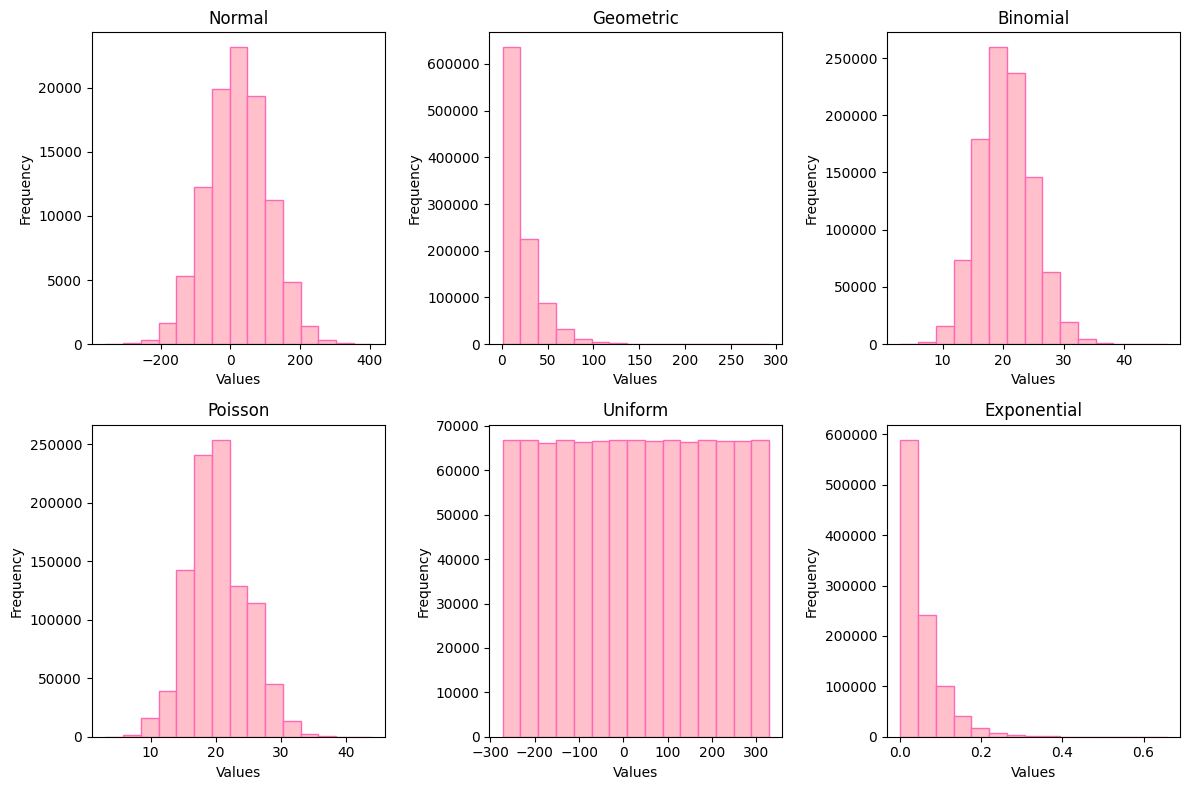

In [50]:
a = np.min(data)
b = np.max(data)

plot_all_histograms(mean, rms_deviation, a, b)

### Set 3

In [53]:
file_path = "set_3.csv"

data = get_data_from_csv_file(file_path, 'float')[0]

data, outliers = remove_outliers(data, 4)
print('Detected outliers: ', outliers)
print(len(outliers))

Detected outliers:  [1.423647, 1.06056, 1.045517, -0.928331, -0.765729, 1.135405, -0.786022, -0.855176, 1.051745, -0.672572, 1.186025, -0.970177, 1.11799, 1.561938, 1.04075, 0.797098, 1.036091, 1.069711, -0.667916, -0.902397, 0.783669, -0.835353, 0.821754, -0.933828, 1.160196, -0.978857, 1.283749, 0.901937, -0.974837, -0.936958, 0.985624, -0.991534, -0.92384, -0.717637, -0.819887, -0.978372, 0.765471, 0.838694, 1.146699, -0.992685, 1.229695, -0.86878, -0.856396, -0.967514, -0.991492, 1.031441, 0.867893, -0.694307, 1.191025, 1.057926, 1.273322, -0.94652, -0.807244, 1.694251, -0.863382, 1.03631, 1.144102, 1.094726, 0.868856, -0.864615, 0.824344, 1.10349, -0.899297, 0.813134, 1.023666, -0.925658, -0.968283, 1.004709, 1.015102, -0.893944, 1.194934, -0.894858, 1.003878, 1.067375, 1.000121, 1.171489, 1.296976, 1.044162, 0.864301, -0.759507, 0.845989, 1.083586, -0.728146, 1.003931, -0.924993, 1.376657, 1.014505, 1.103568, 1.018837, 1.105375, -0.975325, 1.154908, 1.11251, 1.095757, 1.370554, -

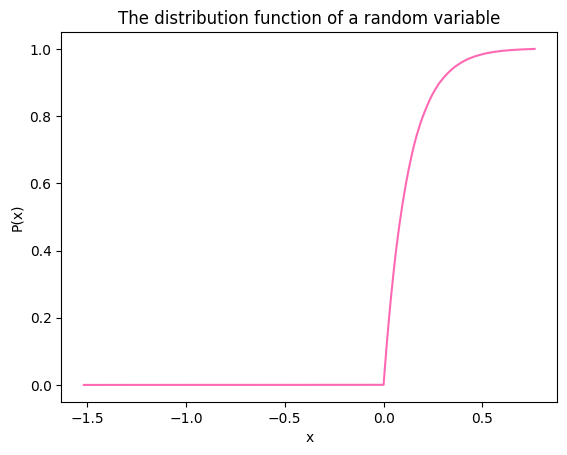

In [54]:
plot_distribution_function(data)

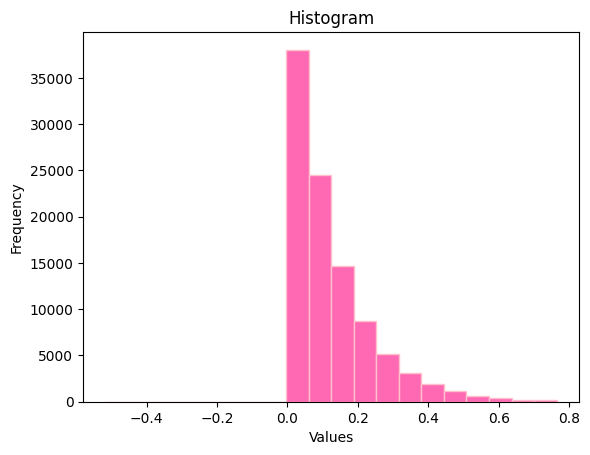

In [57]:
plot_histogram(data, 20)

In [58]:
mean, variance, rms_deviation = get_the_characteristics(data)

print('Mean = ', mean)
print('Variance = ', variance)
print('RMS deviation = ', rms_deviation)

Mean =  0.12262900151820148
Variance =  0.014258021857254308
RMS deviation =  0.11940695899843655


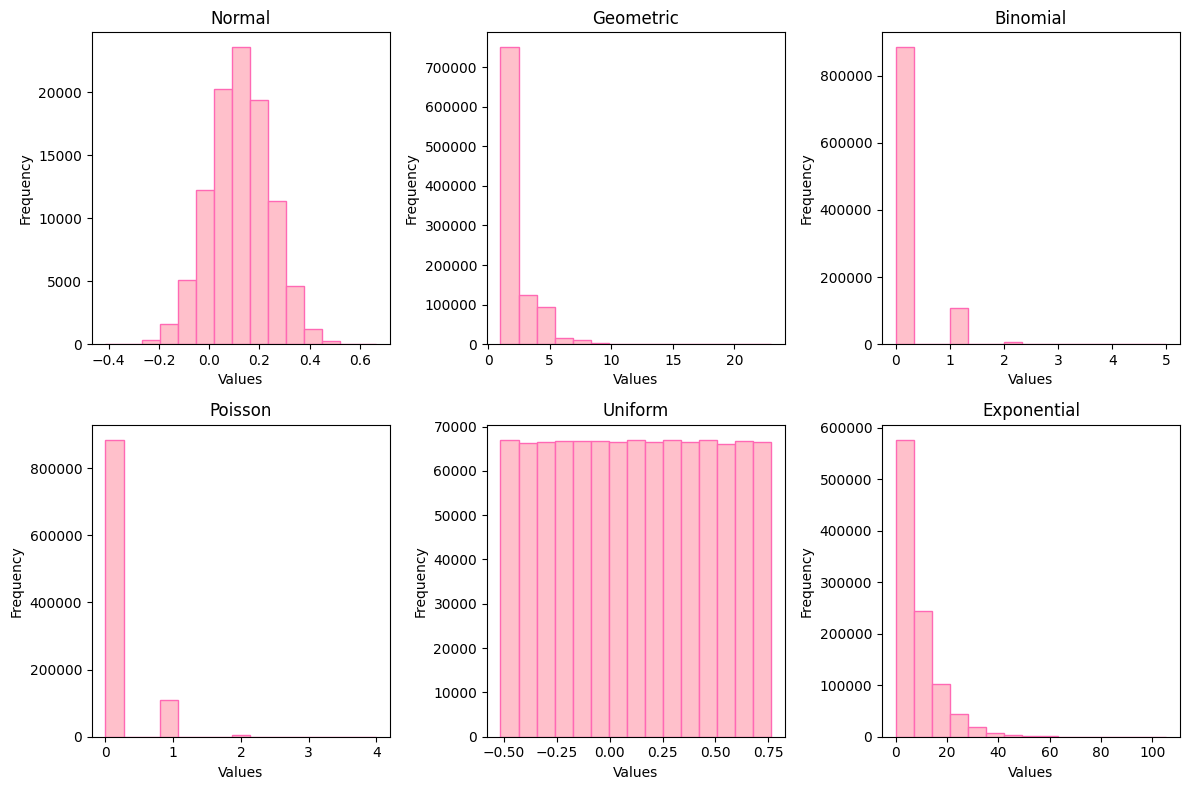

In [59]:
a = np.min(data)
b = np.max(data)

plot_all_histograms(mean, rms_deviation, a, b)

In [60]:
warnings.filterwarnings('default')

### Additional
*Functions for plotting various distributions:*

In [117]:
def plot_normal_distribution(mean: float, variance: float, rms_deviation: float, a: float, b: float) -> None:
    x = np.linspace(a, b, 1000)
    f_x = 1 / (rms_deviation * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * variance))

    plt.plot(x, f_x, color='mediumblue')

    plt.title('Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')


def plot_geometric_distribution(mean: float, a: float, b: float) -> None:
    p = 1 / mean
    x = list(range(int(a), int(b)))
    f_x = [(1 - p) ** (val - 1) * p for val in x]

    plt.plot(x, f_x, color='mediumblue')

    plt.title('Geometric Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')


def plot_binomial_distribution(mean: float, a: float, b: float) -> None:        
    x = list(range(int(a), int(b)))   
    n = len(x)
    p = mean / n
    f_x = [comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) if k >= 0 else 0 for k in x]

    plt.plot(x, f_x, color='mediumblue')

    plt.title('Binomial Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')


def plot_poisson_distribution(mean: float, a: float, b: float) -> None:
    x = list(range(int(a), int(b)))    

    def factorial_approx(n):
        return gamma(n + 1)

    f_x = [math.exp(-mean) * (mean ** val) / factorial_approx(val) if val >= 0 else 0 for val in x]

    plt.plot(x, f_x, color='mediumblue')

    plt.title('Poisson Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')


def plot_uniform_distribution(a: float, b: float) -> None:
    f_x = 1 / (b - a)
    
    plt.hlines(f_x, a, b, color='mediumblue')

    plt.title('Uniform Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    

def plot_exponential_distribution(mean: float, a: float, b: float) -> None:
    x = np.linspace(a, b, 1000)
    intensity = math.log(2) / mean
    f_x = intensity * np.exp(-intensity * x)

    plt.plot(x, f_x, color='mediumblue')

    plt.title('Exponential Distribution')
    plt.xlabel('x')
    plt.ylabel('Probability Density')

In [118]:
def plot_all_distributions(mean: float, variance: float, rms_deviation: float, a: float, b: float) -> None:
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1)
    plot_normal_distribution(mean, variance, rms_deviation, a, b)

    plt.subplot(2, 3, 2)
    plot_geometric_distribution(mean, a, b)

    plt.subplot(2, 3, 3)
    plot_binomial_distribution(mean, a, b)

    plt.subplot(2, 3, 4)
    plot_poisson_distribution(mean, a, b)

    plt.subplot(2, 3, 5)
    plot_uniform_distribution(a, b)

    plt.subplot(2, 3, 6)
    plot_exponential_distribution(mean, a, b)

    plt.tight_layout()
    plt.show()